In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve , plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

In [5]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

In [6]:
c = df_train.select_dtypes(include=['object']).columns.tolist()

c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [7]:
a =[x for x in c if x!='emotion']
a

['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex']

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in a:
    df_train[i]=le.fit_transform(df_train[i])

for i in a:
    df_test[i]=le.fit_transform(df_test[i])
df_train['emotion']=le.fit_transform(df_train['emotion'])
df_test['emotion']=le.fit_transform(df_test['emotion'])    

In [9]:
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])

In [10]:
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [11]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels =le.classes_)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, xticks_rotation='vertical',cmap='Greens')
    plt.show()

In [12]:
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()

### RANDOM FOREST 

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=100)
                             
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.41025641025641024
F1-score [0.6        0.56       0.27777778 0.3483871  0.32352941 0.07692308
 0.19277108 0.47706422]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        96
           1       0.45      0.73      0.56        96
           2       0.42      0.21      0.28        48
           3       0.46      0.28      0.35        96
           4       0.31      0.34      0.32        96
           5       0.50      0.04      0.08        48
           6       0.23      0.17      0.19        96
           7       0.43      0.54      0.48        48

    accuracy                           0.41       624
   macro avg       0.41      0.38      0.36       624
weighted avg       0.40      0.41      0.38       624



BILANCIAMO

In [15]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [25]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder

scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features


scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test



In [26]:
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])

In [27]:
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [28]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})


In [29]:
clf = RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=100)
                             
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4358974358974359
F1-score [0.56910569 0.58461538 0.31428571 0.34899329 0.34653465 0.27118644
 0.2745098  0.4587156 ]
              precision    recall  f1-score   support

           0       0.47      0.73      0.57        96
           1       0.46      0.79      0.58        96
           2       0.50      0.23      0.31        48
           3       0.49      0.27      0.35        96
           4       0.33      0.36      0.35        96
           5       0.73      0.17      0.27        48
           6       0.37      0.22      0.27        96
           7       0.41      0.52      0.46        48

    accuracy                           0.44       624
   macro avg       0.47      0.41      0.40       624
weighted avg       0.45      0.44      0.41       624



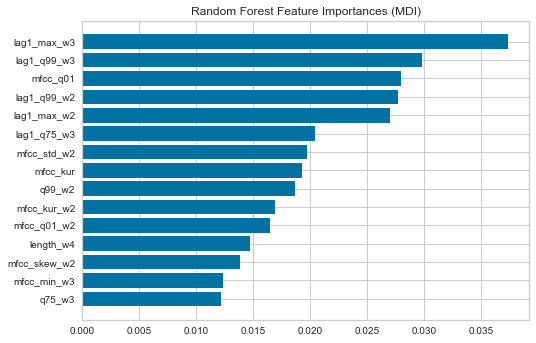

In [30]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(col)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [19]:
from sklearn.inspection import permutation_importance

In [31]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

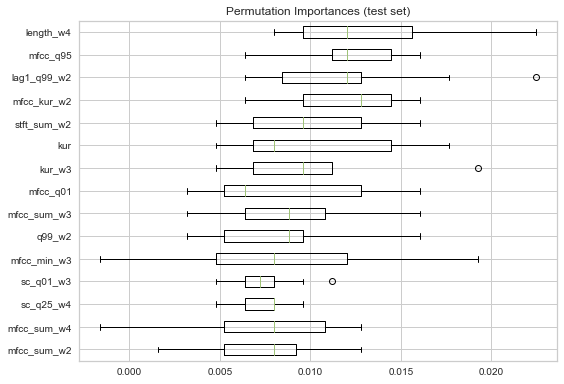

In [32]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(col)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [30]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [1]:
"""for i in range(100):
    dot_data = tree.export_graphviz(clf.estimators_[i], out_file=None,  
                                feature_names=col, 
                                #class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    Image(graph.create_png())"""
    #print trees"
 








"for i in range(100):\n    dot_data = tree.export_graphviz(clf.estimators_[i], out_file=None,  \n                                feature_names=col, \n                                #class_names=['stay', 'churn'],  \n                                filled=True, rounded=True,  \n                                special_characters=True)  \n    graph = pydotplus.graph_from_dot_data(dot_data)  \n    Image(graph.create_png())"

PROVO A CANCELLARE GLI OUTLIER 

In [33]:
df_copy = df_train.copy()

In [34]:
tmp=[8,249,292,308,309,311,382,554,832,1247,1283,1358,1481,1492,1702,1703,1704,1756,1757,1758,1801]

df_copy.drop(tmp,axis=0)

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,5,0,1,0,1,0.018034,0.603864,-0.063106,-0.76930,...,-4.354785,0.161158,-0.925138,2.167997,1.515260,1.079945,0.690192,0.036057,9.400360,-3.035005
1,1,5,0,1,1,1,0.013950,0.603864,-0.063106,-0.76930,...,-0.659640,-0.173413,1.908839,1.610931,0.996435,0.639413,0.409754,0.036057,-0.186504,0.434538
2,1,5,0,0,0,1,0.018855,0.622665,-0.063106,-0.76930,...,-3.086640,-0.286208,-0.925138,1.285119,1.118715,0.877776,0.722854,0.036057,2.891302,-1.463754
3,1,5,0,0,1,1,0.018087,0.603864,-0.063106,-0.76930,...,-0.396009,-0.588962,1.429546,1.176485,0.899140,0.723117,0.560400,0.036057,-0.049566,-0.052845
4,1,1,0,1,0,1,0.015921,0.603864,-0.063106,-0.76930,...,-0.624456,0.170902,0.987370,1.346235,1.065980,0.761301,0.452031,0.036057,0.878701,-0.532241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,0.622665,-0.063106,-0.74864,...,-1.106246,-0.612427,-0.925138,-1.198817,0.514836,0.503321,0.647428,0.036057,1.054354,-1.526104
1824,1,7,1,1,0,0,-0.016770,0.603864,-0.063106,-0.74864,...,-0.901054,-0.871550,-0.925138,-1.198817,-0.484862,0.298852,0.734806,0.036057,-0.389173,-0.504115
1825,1,7,1,1,1,0,-0.025751,0.622665,-0.063106,-0.74864,...,-1.106898,-0.894085,-0.925138,-0.618677,-0.058185,0.167249,0.624605,0.036057,-0.130100,-0.454243
1826,1,7,1,0,0,0,-0.009914,0.603864,-0.063106,-0.70732,...,-0.732249,-0.424644,-0.925138,-1.198817,0.165989,0.375767,0.343780,0.036057,0.072917,-1.058564


In [35]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})


In [36]:
clf = RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=100)
                             
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4407051282051282
F1-score [0.58634538 0.59230769 0.33802817 0.37762238 0.34782609 0.23728814
 0.22516556 0.48148148]
              precision    recall  f1-score   support

           0       0.48      0.76      0.59        96
           1       0.47      0.80      0.59        96
           2       0.52      0.25      0.34        48
           3       0.57      0.28      0.38        96
           4       0.32      0.38      0.35        96
           5       0.64      0.15      0.24        48
           6       0.31      0.18      0.23        96
           7       0.43      0.54      0.48        48

    accuracy                           0.44       624
   macro avg       0.47      0.42      0.40       624
weighted avg       0.45      0.44      0.41       624



TODO : STAMPARE GLI ALBERI + GRAFICI ( RICONTROLLARLI TUTTI) + FARE UNA GRID SEARCH